In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf


In [4]:
print(dir(yf))

['EquityQuery', 'Industry', 'Screener', 'Sector', 'Ticker', 'Tickers', '__all__', '__author__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'base', 'cache', 'const', 'data', 'domain', 'download', 'enable_debug_mode', 'exceptions', 'multi', 'scrapers', 'screener', 'set_tz_cache_location', 'shared', 'ticker', 'tickers', 'utils', 'version', 'warnings']


In [115]:
## Cretaing a function for pulling data from yahoo finance to generate mean ruturns and covariance
def new_data(stocks, start, end):
    try:
        stk_data = yf.download(stocks, start=start, end=end)['Close']
        stk_data = stk_data.dropna()  # Drop rows with missing values
        returns = stk_data.pct_change().dropna()  # Calculate percentage changes
        mean_of_return = returns.mean()  # Mean returns for each stock
        cov_matrix = returns.cov()  # Covariance matrix of returns
        return mean_of_return, cov_matrix
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None, None

In [117]:
## Creating our portfolio and determining start date, end date for our function (new_data)
stk_list = ['LCID', 'NVDA', 'WBD', 'TXN', 'JBLU', 'JD']
stocks = [stock for stock in stk_list]  
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=300)

In [121]:
### printing the mean returns and Covariance of our portfolio
mean_of_return, cov_matrix = new_data(stocks, startDate, endDate)
print("Mean of Returns:", mean_of_return)
print("Covariance Matrix:", cov_matrix)


[*********************100%***********************]  6 of 6 completed

Mean of Returns: Ticker
JBLU    0.001366
JD      0.002919
LCID   -0.001019
NVDA    0.003883
TXN     0.001037
WBD     0.000794
dtype: float64
Covariance Matrix: Ticker      JBLU        JD      LCID      NVDA       TXN       WBD
Ticker                                                            
JBLU    0.001916  0.000186  0.000234 -0.000098  0.000039  0.000286
JD      0.000186  0.001180  0.000392  0.000131  0.000118  0.000193
LCID    0.000234  0.000392  0.002274  0.000037  0.000248  0.000301
NVDA   -0.000098  0.000131  0.000037  0.001216  0.000224 -0.000035
TXN     0.000039  0.000118  0.000248  0.000224  0.000323  0.000106
WBD     0.000286  0.000193  0.000301 -0.000035  0.000106  0.000938


In [123]:
## defining randon weights of the portfolio
weight_port = np.random.random(len(mean_of_return))
weight_port /= np.sum(weight_port)
print(weight_port)

[0.44719585 0.04549761 0.00203084 0.38788309 0.00486138 0.11253123]


In [165]:
## Begining of the monte Carlo simulation
no_of_simulations = 100
tf_days = 100

In [167]:
Mean_matrix  = np.full(shape = (tf_days, len(weight_port)), fill_value = mean_of_return)
mean_matrix = Mean_matrix.T
mean_matrix

array([[ 0.00136639,  0.00136639,  0.00136639,  0.00136639,  0.00136639,
         0.00136639,  0.00136639,  0.00136639,  0.00136639,  0.00136639,
         0.00136639,  0.00136639,  0.00136639,  0.00136639,  0.00136639,
         0.00136639,  0.00136639,  0.00136639,  0.00136639,  0.00136639,
         0.00136639,  0.00136639,  0.00136639,  0.00136639,  0.00136639,
         0.00136639,  0.00136639,  0.00136639,  0.00136639,  0.00136639,
         0.00136639,  0.00136639,  0.00136639,  0.00136639,  0.00136639,
         0.00136639,  0.00136639,  0.00136639,  0.00136639,  0.00136639,
         0.00136639,  0.00136639,  0.00136639,  0.00136639,  0.00136639,
         0.00136639,  0.00136639,  0.00136639,  0.00136639,  0.00136639,
         0.00136639,  0.00136639,  0.00136639,  0.00136639,  0.00136639,
         0.00136639,  0.00136639,  0.00136639,  0.00136639,  0.00136639,
         0.00136639,  0.00136639,  0.00136639,  0.00136639,  0.00136639,
         0.00136639,  0.00136639,  0.00136639,  0.0

In [169]:
port_sims = np.full(shape = (tf_days, no_of_simulations), fill_value = 0.0)
port_sims

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [171]:
initial = 10000
for i in range(0, no_of_simulations):
    x = np.random.normal(size= (tf_days, len(weight_port)))
    low_tri = np.linalg.cholesky(cov_matrix)
    daily_ret = mean_matrix + np.inner(low_tri, x)
    port_sims[:,i] = np.cumprod(np.inner(weight_port, daily_ret.T)+1)*initial

Text(0.5, 1.0, 'Monte Carlo Simulation of our Portfolio')

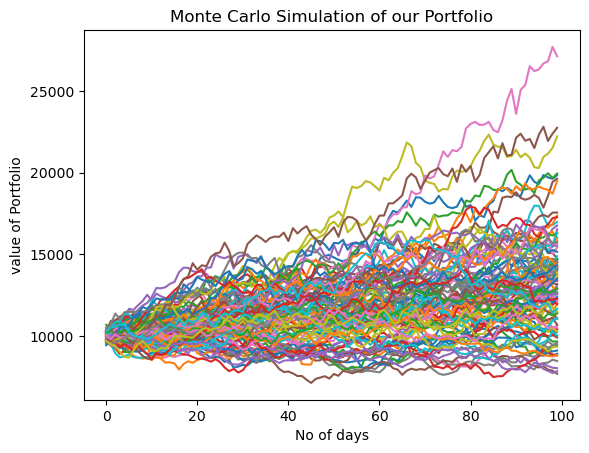

In [173]:
plt.plot(port_sims)
plt.ylabel('value of Portfolio')
plt.xlabel('No of days')
plt.title('Monte Carlo Simulation of our Portfolio')